<a href="https://colab.research.google.com/github/MuhammedShiway/TEKNOFEST-2023/blob/main/BIRADS_CATEGORY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pydicom opencv-python

In [ ]:
import os
import cv2
import time
#import pydicom
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Rescaling, MaxPooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
#from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.efficientnet import EfficientNetB2

In [ ]:
# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
folder_path = "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/384/BIRADS/ALL"


xl_path = "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/tabdata.xlsx"
train_dir = "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/384/BIRADS/SPLIT/Train"
val_dir = "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/384/BIRADS/SPLIT/Val"
test_dir = "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/384/BIRADS/SPLIT/Test"

#ctrain_dir = "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/1024/JUST 4/CTRAIN"
#cval_dir = "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/1024/JUST 4/CVAL"

# WHATEVER

In [ ]:
import os

directory = folder_path
total = 0

folders = ['BI-RADS0', 'BI-RADS1-2', 'BI-RADS4-5']

for folder in folders:
    f_path = os.path.join(directory, folder)
    png_count = len([file for file in os.listdir(f_path) if file.endswith('.png')])
    print(f'{folder}: {png_count} PNG images')

    total += png_count


In [ ]:
total

3979

In [ ]:
image_size = 384
batch_size = 3
channels = 3

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  folder_path,
  labels  = 'inferred',
  label_mode = 'categorical',
  color_mode = 'rgb',
  #color_mode = 'grayscale',
  validation_split=0.2,
  subset="training",
  seed=14,
  image_size=(image_size, image_size),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  folder_path,
  labels  = 'inferred',
  label_mode = 'categorical',
  color_mode = 'rgb',
  #color_mode = 'grayscale',
  validation_split=0.2,
  subset="validation",
  seed=14,
  image_size=(image_size, image_size),
  batch_size=batch_size)

Found 15846 files belonging to 3 classes.
Using 12677 files for training.
Found 15846 files belonging to 3 classes.
Using 3169 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['BI-RADS0', 'BI-RADS1-2', 'BI-RADS4-5']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

# VGG16

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(image_size,image_size,channels))   
  ]
)

In [ ]:
history = {}
epochs  = 50
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define VGG16 model
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, channels))

# Define VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, channels))

# Fine-tune layers in base model
for layer in base_model.layers[:-4]:
    layer.trainable = False
    
# Fine-tune layers in base model
#for layer in base_model.layers[-5:]:
#    layer.trainable = True

# Add layers for classification
model = Sequential()
#model.add(data_augmentation)
model.add(Rescaling(1./255))
model.add(BatchNormalization())
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# Train model
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/50
4226/4226 [==============================] - 767s 178ms/step - loss: 1.0477 - accuracy: 0.4519 - val_loss: 1.0282 - val_accuracy: 0.4942
Epoch 2/50
4226/4226 [==============================] - 570s 135ms/step - loss: 1.0139 - accuracy: 0.4940 - val_loss: 1.0271 - val_accuracy: 0.4904
Epoch 3/50
4226/4226 [==============================] - 572s 135ms/step - loss: 0.9865 - accuracy: 0.5187 - val_loss: 1.0493 - val_accuracy: 0.4979
Epoch 4/50
4226/4226 [==============================] - 573s 136ms/step - loss: 0.9518 - accuracy: 0.5500 - val_loss: 1.0357 - val_accuracy: 0.5002
Epoch 5/50
3224/4226 [=====================>........] - ETA: 2:02 - loss: 0.9158 - accuracy: 0.5746

KeyboardInterrupt: ignored

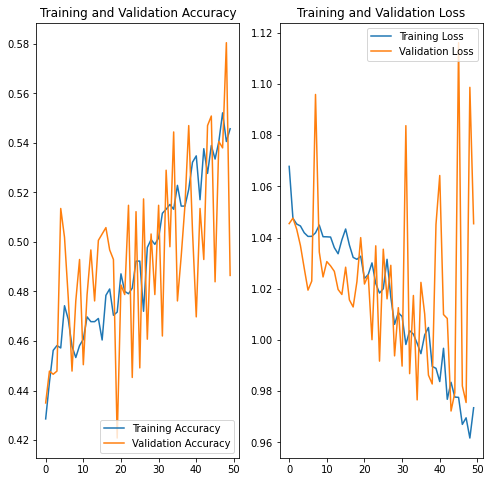

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# TORCH 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# define the transforms
train_transforms = transforms.Compose([
    transforms.Grayscale(3),
    transforms.Resize((224, 224)),
    #transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
    transforms.RandomRotation(10),
    
    transforms.ToTensor(),
    transforms.Normalize([0.485], [0.229])
])

test_transforms = transforms.Compose([
    transforms.Grayscale(3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485], [0.229])
])

# load the data
train_set = torchvision.datasets.ImageFolder(train_dir, transform=train_transforms)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)

test_set = torchvision.datasets.ImageFolder(val_dir, transform=test_transforms)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)


# create data loaders for the training and testing sets
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)


In [ ]:
device

device(type='cuda', index=0)

## MANUAL

In [ ]:
# define the model architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 3)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = self.pool(nn.functional.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)
        x = nn.functional.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

net = Net().to(device)

# define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## RESNET 18
 




In [ ]:
#curr_dev = cdd.get_current_device()
#curr_dev.reset()

In [ ]:
import torch.nn as nn
import torchvision.models as models

model = torchvision.models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 3)

net = model.to(device)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
from tqdm import tqdm

# Define the training loop
def train(net, criterion, optimizer, train_loader, num_epochs):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in tqdm(enumerate(train_loader, 0), total=len(train_loader)):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_loss = running_loss / len(train_loader)
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, epoch_loss))

# define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [ ]:
train(net, criterion, optimizer, train_loader, num_epochs=150)

100%|██████████| 57/57 [00:54<00:00,  1.05it/s]


Epoch [1/150], Loss: 1.8471


100%|██████████| 57/57 [00:54<00:00,  1.05it/s]


Epoch [2/150], Loss: 1.0715


100%|██████████| 57/57 [00:53<00:00,  1.07it/s]


Epoch [3/150], Loss: 1.0698


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [4/150], Loss: 1.0557


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [5/150], Loss: 1.0423


100%|██████████| 57/57 [00:53<00:00,  1.08it/s]


Epoch [6/150], Loss: 1.0395


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [7/150], Loss: 1.0316


100%|██████████| 57/57 [00:53<00:00,  1.07it/s]


Epoch [8/150], Loss: 1.0397


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [9/150], Loss: 1.0252


100%|██████████| 57/57 [00:53<00:00,  1.07it/s]


Epoch [10/150], Loss: 1.0185


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [11/150], Loss: 1.0054


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [12/150], Loss: 1.0152


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [13/150], Loss: 1.0050


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [14/150], Loss: 1.0174


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [15/150], Loss: 1.0138


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [16/150], Loss: 0.9905


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [17/150], Loss: 0.9933


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [18/150], Loss: 1.0007


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [19/150], Loss: 0.9777


100%|██████████| 57/57 [00:54<00:00,  1.04it/s]


Epoch [20/150], Loss: 0.9671


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [21/150], Loss: 0.9641


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [22/150], Loss: 0.9681


100%|██████████| 57/57 [00:53<00:00,  1.07it/s]


Epoch [23/150], Loss: 0.9549


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [24/150], Loss: 0.9603


100%|██████████| 57/57 [00:53<00:00,  1.07it/s]


Epoch [25/150], Loss: 0.9613


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [26/150], Loss: 0.9590


100%|██████████| 57/57 [00:53<00:00,  1.07it/s]


Epoch [27/150], Loss: 0.9383


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [28/150], Loss: 0.9472


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [29/150], Loss: 0.9246


100%|██████████| 57/57 [00:53<00:00,  1.07it/s]


Epoch [30/150], Loss: 0.9575


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [31/150], Loss: 0.9168


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [32/150], Loss: 0.9206


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [33/150], Loss: 0.9025


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [34/150], Loss: 0.9233


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [35/150], Loss: 0.9104


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [36/150], Loss: 0.9082


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [37/150], Loss: 0.8906


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [38/150], Loss: 0.8852


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [39/150], Loss: 0.8817


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [40/150], Loss: 0.8956


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [41/150], Loss: 0.8824


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [42/150], Loss: 0.8625


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [43/150], Loss: 0.8551


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [44/150], Loss: 0.8410


100%|██████████| 57/57 [00:53<00:00,  1.07it/s]


Epoch [45/150], Loss: 0.8516


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [46/150], Loss: 0.8327


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [47/150], Loss: 0.8287


100%|██████████| 57/57 [00:53<00:00,  1.07it/s]


Epoch [48/150], Loss: 0.8354


100%|██████████| 57/57 [00:53<00:00,  1.07it/s]


Epoch [49/150], Loss: 0.8380


100%|██████████| 57/57 [00:53<00:00,  1.07it/s]


Epoch [50/150], Loss: 0.8062


100%|██████████| 57/57 [00:53<00:00,  1.07it/s]


Epoch [51/150], Loss: 0.8202


100%|██████████| 57/57 [00:52<00:00,  1.09it/s]


Epoch [52/150], Loss: 0.8287


100%|██████████| 57/57 [00:52<00:00,  1.09it/s]


Epoch [53/150], Loss: 0.7905


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [54/150], Loss: 0.8028


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [55/150], Loss: 0.8061


100%|██████████| 57/57 [00:52<00:00,  1.09it/s]


Epoch [56/150], Loss: 0.7541


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [57/150], Loss: 0.7549


100%|██████████| 57/57 [00:52<00:00,  1.09it/s]


Epoch [58/150], Loss: 0.7696


100%|██████████| 57/57 [00:52<00:00,  1.09it/s]


Epoch [59/150], Loss: 0.7127


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [60/150], Loss: 0.6965


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [61/150], Loss: 0.6993


100%|██████████| 57/57 [00:52<00:00,  1.09it/s]


Epoch [62/150], Loss: 0.7514


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [63/150], Loss: 0.7085


100%|██████████| 57/57 [00:52<00:00,  1.09it/s]


Epoch [64/150], Loss: 0.6873


100%|██████████| 57/57 [00:52<00:00,  1.09it/s]


Epoch [65/150], Loss: 0.6727


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [66/150], Loss: 0.7161


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [67/150], Loss: 0.6871


100%|██████████| 57/57 [00:52<00:00,  1.09it/s]


Epoch [68/150], Loss: 0.6400


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]


Epoch [69/150], Loss: 0.6134


100%|██████████| 57/57 [00:51<00:00,  1.10it/s]


Epoch [70/150], Loss: 0.6087


100%|██████████| 57/57 [00:51<00:00,  1.10it/s]


Epoch [71/150], Loss: 0.6032


100%|██████████| 57/57 [00:51<00:00,  1.10it/s]


Epoch [72/150], Loss: 0.6063


100%|██████████| 57/57 [00:51<00:00,  1.10it/s]


Epoch [73/150], Loss: 0.5476


100%|██████████| 57/57 [00:51<00:00,  1.10it/s]


Epoch [74/150], Loss: 0.5477


100%|██████████| 57/57 [00:51<00:00,  1.10it/s]


Epoch [75/150], Loss: 0.5678


100%|██████████| 57/57 [00:51<00:00,  1.10it/s]


Epoch [76/150], Loss: 0.5208


100%|██████████| 57/57 [00:51<00:00,  1.10it/s]


Epoch [77/150], Loss: 0.4815


100%|██████████| 57/57 [00:51<00:00,  1.10it/s]


Epoch [78/150], Loss: 0.5353


100%|██████████| 57/57 [00:51<00:00,  1.10it/s]


Epoch [79/150], Loss: 0.4563


100%|██████████| 57/57 [00:52<00:00,  1.09it/s]


Epoch [80/150], Loss: 0.4476


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [81/150], Loss: 0.5469


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [82/150], Loss: 0.3861


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [83/150], Loss: 0.4166


100%|██████████| 57/57 [00:51<00:00,  1.10it/s]


Epoch [84/150], Loss: 0.3711


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [85/150], Loss: 0.4578


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [86/150], Loss: 0.3935


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [87/150], Loss: 0.4041


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [88/150], Loss: 0.3053


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [89/150], Loss: 0.3346


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [90/150], Loss: 0.4352


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [91/150], Loss: 0.2785


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [92/150], Loss: 0.1770


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [93/150], Loss: 0.2658


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [94/150], Loss: 0.3670


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [95/150], Loss: 0.2241


100%|██████████| 57/57 [00:51<00:00,  1.10it/s]


Epoch [96/150], Loss: 0.2123


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [97/150], Loss: 0.3801


100%|██████████| 57/57 [00:52<00:00,  1.09it/s]


Epoch [98/150], Loss: 0.1641


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [99/150], Loss: 0.2990


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [100/150], Loss: 0.1160


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [101/150], Loss: 0.1635


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [102/150], Loss: 0.1752


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [103/150], Loss: 0.1500


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [104/150], Loss: 0.0984


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [105/150], Loss: 0.1261


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [106/150], Loss: 0.1170


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [107/150], Loss: 0.1053


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [108/150], Loss: 0.1377


100%|██████████| 57/57 [00:51<00:00,  1.12it/s]


Epoch [109/150], Loss: 0.2353


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [110/150], Loss: 0.2766


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [111/150], Loss: 0.0879


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [112/150], Loss: 0.1066


100%|██████████| 57/57 [00:51<00:00,  1.12it/s]


Epoch [113/150], Loss: 0.0687


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [114/150], Loss: 0.0511


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [115/150], Loss: 0.2000


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [116/150], Loss: 0.1696


100%|██████████| 57/57 [00:51<00:00,  1.10it/s]


Epoch [117/150], Loss: 0.0652


100%|██████████| 57/57 [00:51<00:00,  1.10it/s]


Epoch [118/150], Loss: 0.0799


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [119/150], Loss: 0.1023


100%|██████████| 57/57 [00:51<00:00,  1.10it/s]


Epoch [120/150], Loss: 0.0958


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [121/150], Loss: 0.0963


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [122/150], Loss: 0.1386


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [123/150], Loss: 0.1170


100%|██████████| 57/57 [00:51<00:00,  1.12it/s]


Epoch [124/150], Loss: 0.1183


100%|██████████| 57/57 [00:51<00:00,  1.12it/s]


Epoch [125/150], Loss: 0.0559


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [126/150], Loss: 0.3507


100%|██████████| 57/57 [00:50<00:00,  1.12it/s]


Epoch [127/150], Loss: 0.0553


100%|██████████| 57/57 [00:50<00:00,  1.12it/s]


Epoch [128/150], Loss: 0.0328


100%|██████████| 57/57 [00:50<00:00,  1.12it/s]


Epoch [129/150], Loss: 0.0269


100%|██████████| 57/57 [00:50<00:00,  1.12it/s]


Epoch [130/150], Loss: 0.0442


100%|██████████| 57/57 [00:51<00:00,  1.12it/s]


Epoch [131/150], Loss: 0.0772


100%|██████████| 57/57 [00:50<00:00,  1.12it/s]


Epoch [132/150], Loss: 0.0825


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [133/150], Loss: 0.0861


100%|██████████| 57/57 [00:51<00:00,  1.10it/s]


Epoch [134/150], Loss: 0.0326


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [135/150], Loss: 0.0786


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [136/150], Loss: 0.0509


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [137/150], Loss: 0.0299


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [138/150], Loss: 0.0140


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [139/150], Loss: 0.0300


100%|██████████| 57/57 [00:50<00:00,  1.12it/s]


Epoch [140/150], Loss: 0.0225


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [141/150], Loss: 0.0976


100%|██████████| 57/57 [00:50<00:00,  1.12it/s]


Epoch [142/150], Loss: 0.0488


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [143/150], Loss: 0.0266


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [144/150], Loss: 0.0272


100%|██████████| 57/57 [00:50<00:00,  1.12it/s]


Epoch [145/150], Loss: 0.0410


100%|██████████| 57/57 [00:50<00:00,  1.12it/s]


Epoch [146/150], Loss: 0.1401


100%|██████████| 57/57 [00:53<00:00,  1.07it/s]


Epoch [147/150], Loss: 0.0349


100%|██████████| 57/57 [00:51<00:00,  1.11it/s]


Epoch [148/150], Loss: 0.0107


100%|██████████| 57/57 [00:51<00:00,  1.10it/s]


Epoch [149/150], Loss: 0.0021


100%|██████████| 57/57 [00:52<00:00,  1.08it/s]

Epoch [150/150], Loss: 0.0025


In [ ]:
# evaluate the model on the test set
net.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print('Accuracy of the network on the test images: {:.2f}%'.format(accuracy))


Accuracy of the network on the test images: 44.67%


# VGG16 + ML

In [ ]:
from keras.models import Model

base_model = VGG16(weights='imagenet', include_top = False)

model = Model(inputs = base_model.input, outputs = base_model.get_layer('block5_pool').output)

#Extract features from the data
train_features = model.predict(train_ds)
val_features = model.predict(val_ds)

25/25 [==============================] - 1s 18ms/step


In [ ]:
train_labels = []
for images, labels in train_ds:
    train_labels.extend(labels.numpy())
train_labels = np.array(train_labels)

# To turn it back into 1d
train_labels = np.argmax(train_labels, axis=1)

val_labels = []
for images, labels in val_ds:
    val_labels.extend(labels.numpy())
val_labels = np.array(val_labels)

val_labels = np.argmax(val_labels, axis=1)

In [ ]:
#Reshape for SVM Classifier


train_features = np.reshape(train_features, (train_features.shape[0], -1))
val_features = np.reshape(val_features, (val_features.shape[0], -1))


#Train the SVM Classifier
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', C = 1.0, probability = True)
svm.fit(train_features, train_labels)

#Evaluate of Validation data
from sklearn.metrics import classification_report
val_pred = svm.predict(val_features)
print(classification_report(val_labels, val_pred))

              precision    recall  f1-score   support

           0       0.18      0.22      0.20       127
           1       0.38      0.37      0.37       287
           2       0.36      0.32      0.34       259
           3       0.13      0.14      0.13       122

    accuracy                           0.29       795
   macro avg       0.26      0.26      0.26       795
weighted avg       0.30      0.29      0.30       795




# INCEPTION V3 Non-Trainable

In [ ]:
history = {}
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import InceptionV3


# Load InceptionV3 model
base_model = InceptionV3(
    weights="imagenet",
    include_top=False,
    input_shape=(256, 256, 3),
)

# Freeze all layers in base model
for layer in base_model.layers:
    layer.trainable = False

# Add classification layers on top of base model
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation="relu")(x)
outputs = layers.Dense(3, activation="softmax")(x)

# Build and compile model
model = keras.Model(inputs=base_model.input, outputs=outputs)
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(
    optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

# Define callbacks and hyperparameters
early_stopping = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=2)
callbacks = [early_stopping, reduce_lr]
epochs = 25
batch_size = 32

# Fit model to training data
history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
    batch_size=batch_size,
    callbacks=callbacks,
)



KeyboardInterrupt: ignored

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# INCEPTION V3 - Trainable

In [ ]:
#train_dir = "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/1024/JUST 4/TRAIN"
#val_dir = "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/1024/JUST 4/VAL"

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input


# set the image size
img_width, img_height = 256, 256 #299, 299

# set the batch size
batch_size = 32

# create data generators with data augmentation for training and validation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
    #brightness_range=[0.9, 1.1]
    )

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical')

Found 12728 images belonging to 3 classes.
Found 3188 images belonging to 3 classes.


In [ ]:

model = tf.keras.Sequential([
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D((2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation='relu'),
      tf.keras.layers.Dense(3, activation='softmax')
])

# Define optimizer with weight decay
optimizer = tf.keras.optimizers.experimental.AdamW(learning_rate=0.001, weight_decay=0.0001)

# Define learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.001,
        decay_steps=10000,
        decay_rate=0.96)

    # Compile model
model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train model 
model.fit(train_generator, epochs=10, steps_per_epoch=398,
              validation_data=val_generator, validation_steps=99,
              callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_schedule)])


Epoch 1/10
 91/398 [=====>........................] - ETA: 26:15 - loss: 1.5573 - accuracy: 0.4313

KeyboardInterrupt: ignored

In [ ]:
with strategy.scope():
  # create the InceptionV3 model
  base_model = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

  # add a global spatial average pooling layer
  x = base_model.output
  x = GlobalAveragePooling2D()(x)

  # add a fully-connected layer
  x = Dense(1024, activation='relu')(x)

  # add a dropout layer
  x = Dropout(0.5)(x)

  # add a fully-connected layer
  x = Dense(256, activation='relu')(x)
  #x = Dropout(0.5)(x)

  # add a final softmax layer
  predictions = Dense(train_generator.num_classes, activation='softmax')(x)

  # create the full model
  model = Model(inputs=base_model.input, outputs=predictions)

  # set the first 249 layers (up to the last conv block) to non-trainable
  for layer in model.layers[:249]:
      layer.trainable = False

  # compile the model
  model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# create a checkpoint to save the best model weights
checkpoint = ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, mode='max')



In [ ]:
# train the model
import tensorflow as tf

# Initialize TPU strategy
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.TPUStrategy(resolver)

# Define model architecture
with strategy.scope():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

    # Define optimizer with weight decay
    optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.0001)

    # Define learning rate schedule
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.001,
        decay_steps=10000,
        decay_rate=0.96)

    # Compile model
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train model with TPU strategy
with strategy.scope():
    model.fit(train_dataset, epochs=10, steps_per_epoch=1875,
              validation_data=val_dataset, validation_steps=313,
              callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_schedule)])

history = {}
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    callbacks=[checkpoint])


Epoch 1/50


InternalError: ignored

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# XXXXXXXXXXXXXXX

In [ ]:
train_dir = "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/1024/JUST 4/TRAIN"
val_dir = "/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/1024/JUST 4/VAL"

In [ ]:
import tensorflow as tf

class DiffConv(tf.keras.layers.Layer):
    def __init__(self):
        super(DiffConv, self).__init__()

    def call(self, x):
        ins, sx, sy, n = x.shape
        self.output_tensor = tf.zeros((ins, n*5, sx, sy), dtype=x.dtype)
        
        for i in range(ins):
            oM, oN = 0, n
            self.output_tensor[i, oM:oN, :, :] = x[i].numpy().copy()

            oM, oN = n, 2*n
            self.output_tensor[i, oM:oN, :sx-1, :] += x[i, :, :sx-1, :].numpy().copy()
            self.output_tensor[i, oM:oN, :sx-1, :] -= x[i, :, 1:sx, :].numpy().copy()

            oM, oN = 2*n, 3*n
            self.output_tensor[i, oM:oN, :, :sy-1] += x[i, :, :, :sy-1].numpy().copy()
            self.output_tensor[i, oM:oN, :, :sy-1] -= x[i, :, :, 1:sy].numpy().copy()

            oM, oN = 3*n, 4*n
            self.output_tensor[i, oM:oN, :sx-1, :sy-1] += x[i, :, :sx-1, :sy-1].numpy().copy()
            self.output_tensor[i, oM:oN, :sx-1, :sy-1] -= x[i, :, 1:sx, 1:sy].numpy().copy()

            oM, oN = 4*n, 5*n
            self.output_tensor[i, oM:oN, :sx-1, :sy-1] += x[i, :, 1:sx, :sy-1].numpy().copy()
            self.output_tensor[i, oM:oN, :sx-1, :sy-1] -= x[i, :, :sx-1, 1:sy].numpy().copy()

        oM, oN = n, 5*n
        self.output_tensor[:, oM:oN, :, :] = tf.abs(self.output[:, oM:oN, :, :])
        return self.output_tensor


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 256
batch_size = 64

# define data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.8, 1.2], # adjusting brightness
    #shear_range=0.2,
    #zoom_range=0.2,
    #horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.8, 1.2], # adjusting brightness
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

# load and preprocess data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical'
)

#Define the multiplier
n = 0.5

# define the model
model = Sequential([
    #Differential Convolution
    #DiffConv(),
    # first convolutional block
    tf.keras.layers.Conv2D(32*n, (7, 7), activation='relu', input_shape=(256, 256, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # second convolutional block
    tf.keras.layers.Conv2D(64*n, (7, 7), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # third convolutional block
    tf.keras.layers.Conv2D(128*n, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # fourth convolutional block
    tf.keras.layers.Conv2D(256*n, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    # fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

my_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# compile the model
model.compile(optimizer=my_optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# fine-tune the model
history = {}
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8),
               #tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
               ]
)

# evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

print('Test accuracy:', test_acc)


Found 1800 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 1879 images belonging to 3 classes.
Epoch 1/50
29/29 [==============================] - 33s 1s/step - loss: 2.6932 - accuracy: 0.3400 - val_loss: 1.0992 - val_accuracy: 0.3333
Epoch 2/50
29/29 [==============================] - 30s 1s/step - loss: 1.1003 - accuracy: 0.3278 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 3/50
29/29 [==============================] - 30s 1s/step - loss: 1.0989 - accuracy: 0.3400 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/50
29/29 [==============================] - 29s 1s/step - loss: 1.0993 - accuracy: 0.3328 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 5/50
29/29 [==============================] - 29s 1s/step - loss: 1.0991 - accuracy: 0.3361 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 6/50
29/29 [==============================] - 29s 1s/step - loss: 1.1000 - accuracy: 0.3311 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 7/50
29/29 [=================

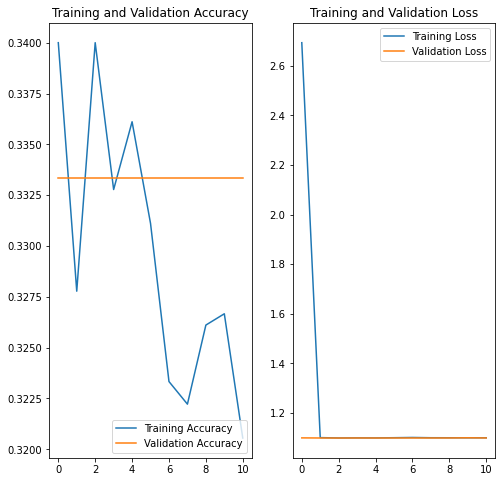

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(11)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# ResNEet 50 implementation

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, BatchNormalization, Add
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 512

# define data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.9, 1.1], # adjusting brightness
    shear_range=0.2,
    zoom_range=0.2,
    #horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.8, 1.2], # adjusting brightness
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

# load and preprocess data
'''
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=32,
    class_mode='categorical'
)


val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(image_size, image_size),
    batch_size=32,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=32,
    class_mode='categorical'
)
'''

def conv_block(x, filters, kernel_size, strides=(2, 2), padding='same', use_bn=True):
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding)(x)
    if use_bn:
        x = BatchNormalization()(x)
    x = tf.nn.relu(x)
    return x


def identity_block(x, filters, kernel_size, padding='same', use_bn=True):
    shortcut = x
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding=padding)(x)
    if use_bn:
        x = BatchNormalization()(x)
    x = tf.nn.relu(x)

    x = Conv2D(filters=filters, kernel_size=kernel_size, padding=padding)(x)
    if use_bn:
        x = BatchNormalization()(x)

    x = Add()([x, shortcut])
    x = tf.nn.relu(x)
    return x


def resnet50(input_shape, num_classes):
    input_tensor = Input(shape=input_shape)
    x = conv_block(input_tensor, filters=64, kernel_size=(7, 7), strides=(2, 2))
    x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    x = conv_block(x, filters=64, kernel_size=(1, 1), padding='valid')
    x = identity_block(x, filters=64, kernel_size=(3, 3))
    x = identity_block(x, filters=64, kernel_size=(3, 3))

    x = conv_block(x, filters=128, kernel_size=(1, 1), padding='valid')
    x = identity_block(x, filters=128, kernel_size=(3, 3))
    x = identity_block(x, filters=128, kernel_size=(3, 3))
    x = identity_block(x, filters=128, kernel_size=(3, 3))

    x = conv_block(x, filters=256, kernel_size=(1, 1), padding='valid')
    x = identity_block(x, filters=256, kernel_size=(3, 3))
    x = identity_block(x, filters=256, kernel_size=(3, 3))
    x = identity_block(x, filters=256, kernel_size=(3, 3))
    x = identity_block(x, filters=256, kernel_size=(3, 3))
    x = identity_block(x, filters=256, kernel_size=(3, 3))

    x = conv_block(x, filters=512, kernel_size=(1, 1), padding='valid')
    x = identity_block(x, filters=512, kernel_size=(3, 3))
    x = identity_block(x, filters=512, kernel_size=(3, 3))
    x = AveragePooling2D(pool_size=(7, 7))(x)
    x = Flatten()(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=x)
    return model


In [ ]:
model = resnet50((image_size,image_size,3), 3)

In [ ]:
optimizer1 = tf.keras.optimizers.Adam(learning_rate=0.00002)

optimizer2 = tf.keras.optimizers.Adagrad(learning_rate=0.01)

optimizer3 = tf.keras.optimizers.RMSprop(learning_rate=0.001)

optimizer4 = tf.keras.optimizers.experimental.AdamW(learning_rate = 0.001)

# compile the model
model.compile(optimizer = optimizer3,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# fine-tune the model
history = {}
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator),
    #callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8),
               #tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)
               
)




In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, verbose=2)

print('Test accuracy:', test_acc)

59/59 - 882s - loss: 3.7913 - accuracy: 0.1825 - 882s/epoch - 15s/step
Test accuracy: 0.18254390358924866


# MERGE WITH TORCH

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from PIL import Image
import os
import torch.optim as optim
from torchvision import transforms
from torch.utils.data import DataLoader

# Define the dataset class
class FourChannelDataset(torch.utils.data.Dataset):
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.samples = []
        self.labels = []
        self.classes = ['BI-RADS0', 'BI-RADS1-2', 'BI-RADS4-5']
        for class_id, class_name in enumerate(self.classes):
            class_folder = os.path.join(self.folder_path, class_name)
            for patient_folder in os.listdir(class_folder):
                patient_path = os.path.join(class_folder, patient_folder)
                image_files = sorted(os.listdir(patient_path))
                #assert len(image_files) == 4, f"Expected 4 images, found {len(image_files)} images in {patient_path}"
                self.samples.append([os.path.join(patient_path, f) for f in image_files])
                self.labels.append(class_id)
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, index):
        sample = self.samples[index]
        label = self.labels[index]
        images = [Image.open(f).convert('L') for f in sample]
        transform = transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.Grayscale(1),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485], std=[0.229])
        ])
        tensor_images = [transform(img) for img in images]
        merged_image = torch.cat(tensor_images, dim=0)
        return merged_image, label

In [ ]:
!pip install efficientnet_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16444 sha256=94ff060f21a29181af0ec196f62b2b797e1af006ec510f8d0141c25398fb0314
  Stored in directory: /root/.cache/pip/wheels/29/16/24/752e89d88d333af39a288421e64d613b5f652918e39ef1f8e3
Successfully built efficientnet_pytorch


In [ ]:
import torch
import numpy as np
import torch.nn as nn

class DiffConv(nn.Module):

    def __init__(self):
        super(DiffConv, self).__init__()

    def forward(self, x):
        sizeofin = x.size()
        
        ins = sizeofin[0]
        n = sizeofin[1]
        sx = sizeofin[2]
        sy = sizeofin[3]  

        self.output = torch.zeros(ins,n*5,sx,sy, device=x.device)
        #self.signInputs = torch.zeros(ins,n*5,sx,sy, device=x.device)
          
        for i in range(0,ins):
            oM = 0
            oN = n
            
            self.output[i,oM:oN,0:sx,0:sy]= x[i].clone()
            
            oM = n
            oN = 2*n

            self.output[i,oM:oN,0:sx-1,0:sy] = self.output[i,oM:oN,0:sx-1,0:sy].add(x[i,0:n,0:sx-1,0:sy])
            self.output[i,oM:oN,0:sx-1,0:sy] = self.output[i,oM:oN,0:sx-1,0:sy].add(-x[i,0:n,1:sx,0:sy])

            oM = 2*n
            oN = 3*n

            self.output[i,oM:oN,0:sx,0:sy-1]=self.output[i,oM:oN,0:sx,0:sy-1].add(x[i,0:n,0:sx,0:sy-1])
            self.output[i,oM:oN,0:sx,0:sy-1]=self.output[i,oM:oN,0:sx,0:sy-1].add(-x[i,0:n,0:sx,1:sy])
            
            oM = 3*n
            oN = 4*n

            self.output[i,oM:oN,0:sx-1,0:sy-1]=self.output[i,oM:oN,0:sx-1,0:sy-1].add(x[i,0:n,0:sx-1,0:sy-1])
            self.output[i,oM:oN,0:sx-1,0:sy-1]=self.output[i,oM:oN,0:sx-1,0:sy-1].add(-x[i,0:n,1:sx,1:sy])

            oM = 4*n
            oN = 5*n
           
            self.output[i,oM:oN,0:sx-1,0:sy-1]=self.output[i,oM:oN,0:sx-1,0:sy-1].add(x[i,0:n,1:sx,0:sy-1])
            self.output[i,oM:oN,0:sx-1,0:sy-1]=self.output[i,oM:oN,0:sx-1,0:sy-1].add(-x[i,0:n,0:sx-1,1:sy])
            

        oM = n
        oN = 5*n

        self.output[0:ins,oM:oN,:,:] = self.output[0:ins,oM:oN].abs()

        return self.output



In [ ]:
import torch
import numpy as np
import torch.nn as nn

class DiffConv3(nn.Module):

    def __init__(self):
        super(DiffConv3, self).__init__()

    def forward(self, x):
        sizeofin = x.size()
        
        ins = sizeofin[0]
        n = sizeofin[1]
        sx = sizeofin[2]
        sy = sizeofin[3]  

        self.output = torch.zeros(ins,n*3,sx,sy, device=x.device)
        #self.signInputs = torch.zeros(ins,n*5,sx,sy, device=x.device)
          
        for i in range(0,ins):
            oM = 0
            oN = n
            
            self.output[i,oM:oN,0:sx,0:sy]= x[i].clone()
            
            oM = n
            oN = 2*n

            self.output[i,oM:oN,0:sx-1,0:sy] = self.output[i,oM:oN,0:sx-1,0:sy].add(x[i,0:n,0:sx-1,0:sy])
            self.output[i,oM:oN,0:sx-1,0:sy] = self.output[i,oM:oN,0:sx-1,0:sy].add(-x[i,0:n,1:sx,0:sy])

            oM = 2*n
            oN = 3*n

            self.output[i,oM:oN,0:sx,0:sy-1]=self.output[i,oM:oN,0:sx,0:sy-1].add(x[i,0:n,0:sx,0:sy-1])
            self.output[i,oM:oN,0:sx,0:sy-1]=self.output[i,oM:oN,0:sx,0:sy-1].add(-x[i,0:n,0:sx,1:sy])
            

        oM = n
        oN = 3*n

        self.output[0:ins,oM:oN,:,:] = self.output[0:ins,oM:oN].abs()

        return self.output



In [ ]:
import torch.nn as nn
from efficientnet_pytorch import EfficientNet

class EfficientNetB0_4chan(nn.Module):
    def __init__(self, num_classes=1000):
        super(EfficientNetB0_4chan, self).__init__()
        self.backbone = EfficientNet.from_pretrained('efficientnet-b0')
        self.backbone._conv_stem = nn.Conv2d(4, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        self.backbone._fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        return self.backbone(x)


In [ ]:

class EfficientNetB0_4chan(nn.Module):
    def __init__(self, num_classes=1000):
        super(EfficientNetB0_4chan, self).__init__()
        self.diff_conv = DiffConv3()
        self.backbone = EfficientNet.from_pretrained('efficientnet-b0')
        self.backbone._conv_stem = nn.Conv2d(12, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        self.backbone._fc = nn.Linear(1280, num_classes)

    def forward(self, x):
        x = self.diff_conv(x)
        return self.backbone(x)


In [ ]:
!pip uninstall torch-xla

Found existing installation: torch-xla 1.0
Uninstalling torch-xla-1.0:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/torch_xla-1.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/torch_xla/*
Proceed (Y/n)? Y
  Successfully uninstalled torch-xla-1.0


In [ ]:
#!pip install torch torchvision torchaudio
!pip install torch-xla -f https://pip.repos.neuron.amazonaws.com

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://pip.repos.neuron.amazonaws.com
  Using cached torch_xla-1.0-py3-none-any.whl (1.4 kB)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.transforms import transforms
from efficientnet_pytorch import EfficientNet
from tqdm import tqdm

In [ ]:
# Define the train and validation datasets and data loaders
train_dataset = FourChannelDataset(train_dir)
val_dataset = FourChannelDataset(val_dir)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


In [ ]:
#os.listdir('/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/1024/JUST 4/AUG TRAIN/BI-RADS1-2/822697033+90')

[]

In [ ]:
#os.rmdir('/content/gdrive/My Drive/Colab Notebooks/TÜSEB 2023/1024/JUST 4/AUG TRAIN/BI-RADS1-2/822702907+CL')

In [ ]:

# Define the number of classes
num_classes = 3

# Instantiate the modified EfficientNetB0 model
model = EfficientNetB0_4chan(num_classes=num_classes)

# Move the model to the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Set the criterion for the loss function
criterion = nn.CrossEntropyLoss()

# Set the optimizer for the model parameters
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 100
for epoch in range(epochs):
    # Set the model to training mode
    model.train()
    
    # Initialize variables to track the training loss and accuracy
    running_loss = 0.0
    running_corrects = 0
    
    # Iterate over the training data in batches
    for inputs, labels in tqdm(train_loader, desc=f'Training Epoch {epoch}'):
        # Move the input and labels to the GPU
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass through the model
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        
        # Compute the loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Update the training loss and accuracy
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
    
    # Compute the training loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)
    
    # Set the model to evaluation mode
    model.eval()
    
    # Initialize variables to track the validation loss and accuracy
    val_loss = 0.0
    val_corrects = 0
    
    # Iterate over the validation data in batches
    for inputs, labels in tqdm(val_loader, desc=f'Validation Epoch {epoch}'):
        # Move the input and labels to the GPU
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # Forward pass through the model
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        
        # Compute the loss
        loss = criterion(outputs, labels)
        
        # Update the validation loss and accuracy
        val_loss += loss.item() * inputs.size(0)
        val_corrects += torch.sum(preds == labels.data)
    
    # Compute the validation loss and accuracy for the epoch
    val_loss /= len(val_loader.dataset)
    val_acc = val_corrects.double() / len(val_loader.dataset)
    
    # Print the training and validation accuracy for the epoch
    print(f'Epoch {epoch}: Train Loss: {epoch_loss:.4f} Train Acc: {epoch_acc:.4f} Val Loss: {val_loss:.4f} Val Acc: {val_acc:.4f}')


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth


  0%|          | 0.00/20.4M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b0


Training Epoch 0:   1%|          | 1/100 [00:49<1:21:31, 49.41s/it]